In [1]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

In [2]:
data = pd.read_csv('../summary_data/WGS_human_kmers.csv')
print(data.columns)
data["Trim Effeciency"] = data["Base - TP TRIM"]/(data["Base - TP TRIM"] + data["Base - FP TRIM"])
data['total_corrections']=data['Base - TP']+ data['Base - FP']
data = data[(data['Kmer Size'] >19)]
data.head()

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency'],
      dtype='object')


,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
16,60,bfc_t1_wgsim_rl__cov_1.1_20.corrected.fastq.gz,run.bfc.sh,20,129,25409,16924,14,4224,0,...,1,100,0.042079,0.086186,-0.404076,0.992932,T1,0.0,NaN,11452
17,63,bfc_t1_wgsim_rl__cov_1.1_21.corrected.fastq.gz,run.bfc.sh,21,134,25446,16905,10,4205,0,...,1,100,0.043988,0.088904,-0.406803,0.992918,T1,0.0,NaN,11608
19,68,bfc_t1_wgsim_rl__cov_2.1_20.corrected.fastq.gz,run.bfc.sh,20,188,25226,16543,15,4728,0,...,2,100,0.047670,0.089869,-0.435099,0.992840,T1,0.0,NaN,12329
22,76,bfc_t1_wgsim_rl__cov_4.1_20.corrected.fastq.gz,run.bfc.sh,20,494,24960,15885,22,5339,0,...,4,100,0.070063,0.120256,-0.442489,0.992851,T1,0.0,NaN,13438
23,78,bfc_t1_wgsim_rl__cov_8.1_20.corrected.fastq.gz,run.bfc.sh,20,1287,24638,14837,24,5914,0,...,8,100,0.125136,0.196295,-0.387217,0.993135,T1,0.0,NaN,14682


In [3]:


data = data[(data['Kmer Size'] ==20) | (data['Kmer Size'] ==22) | (data['Kmer Size'] ==24)| (data['Kmer Size'] ==26) 
           |  (data['Kmer Size'] ==28) |  (data['Kmer Size'] ==30)]

data.head()

,Unnamed: 0,EC Filename,Wrapper Name,Kmer Size,Read - TP,Read - TN,Read - FN,Read - FN WRONG,Read - FP,Read - FP INDEL,...,Coverage,Length,Base Sensitivity,Base Precision,Base Gain,Base Accuracy,Dataset,Trim Percent,Trim Effeciency,total_corrections
16,60,bfc_t1_wgsim_rl__cov_1.1_20.corrected.fastq.gz,run.bfc.sh,20,129,25409,16924,14,4224,0,...,1,100,0.042079,0.086186,-0.404076,0.992932,T1,0.0,NaN,11452
19,68,bfc_t1_wgsim_rl__cov_2.1_20.corrected.fastq.gz,run.bfc.sh,20,188,25226,16543,15,4728,0,...,2,100,0.047670,0.089869,-0.435099,0.992840,T1,0.0,NaN,12329
22,76,bfc_t1_wgsim_rl__cov_4.1_20.corrected.fastq.gz,run.bfc.sh,20,494,24960,15885,22,5339,0,...,4,100,0.070063,0.120256,-0.442489,0.992851,T1,0.0,NaN,13438
23,78,bfc_t1_wgsim_rl__cov_8.1_20.corrected.fastq.gz,run.bfc.sh,20,1287,24638,14837,24,5914,0,...,8,100,0.125136,0.196295,-0.387217,0.993135,T1,0.0,NaN,14682
27,88,bfc_t1_wgsim_rl__cov_1.1_22.corrected.fastq.gz,run.bfc.sh,22,126,25696,17053,6,3819,0,...,1,100,0.038563,0.086678,-0.367777,0.993113,T1,0.0,NaN,10441


In [4]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})
print (color_dict)

{'Bfc': 'purple', 'Bless': 'orange', 'Coral': 'brown', 'Fiona': 'gray', 'Lighter': 'pink', 'Musket': 'blue', 'Pollux': 'yellow', 'Racer': 'green', 'Reckoner': 'red', 'Sga': 'black'}


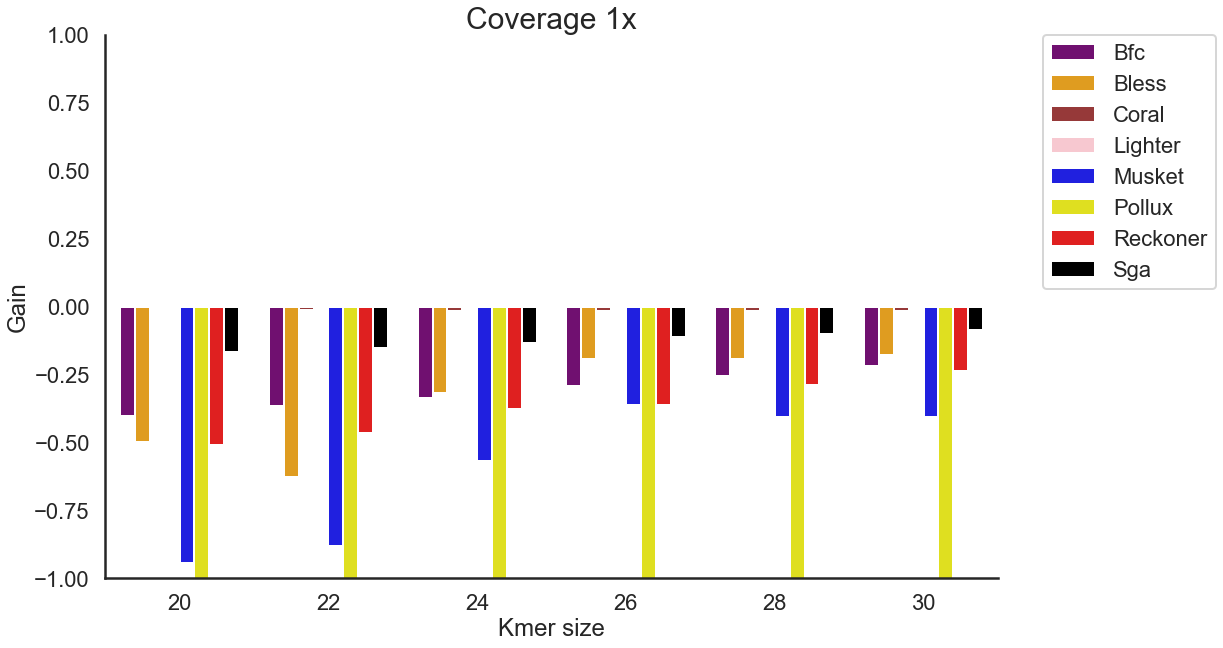

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==1)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 1x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov1.pdf", bbox_inches='tight')

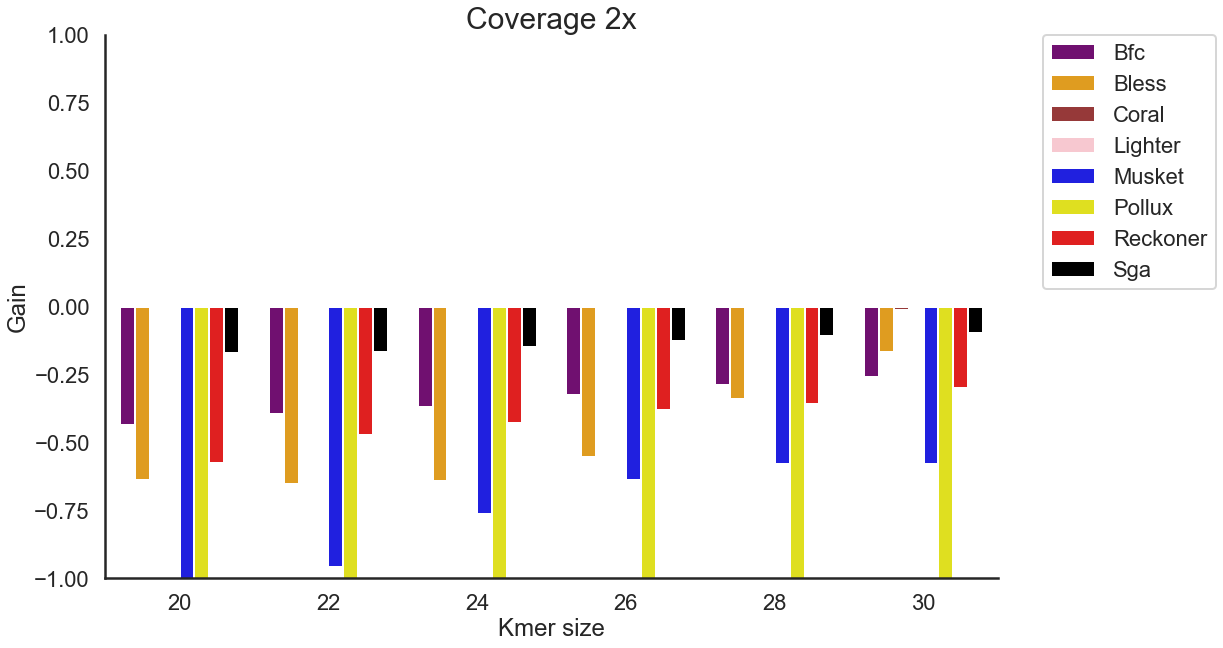

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g = sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==2)], hue='Tool',palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 2x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()

#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov2.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov2.pdf", bbox_inches='tight')

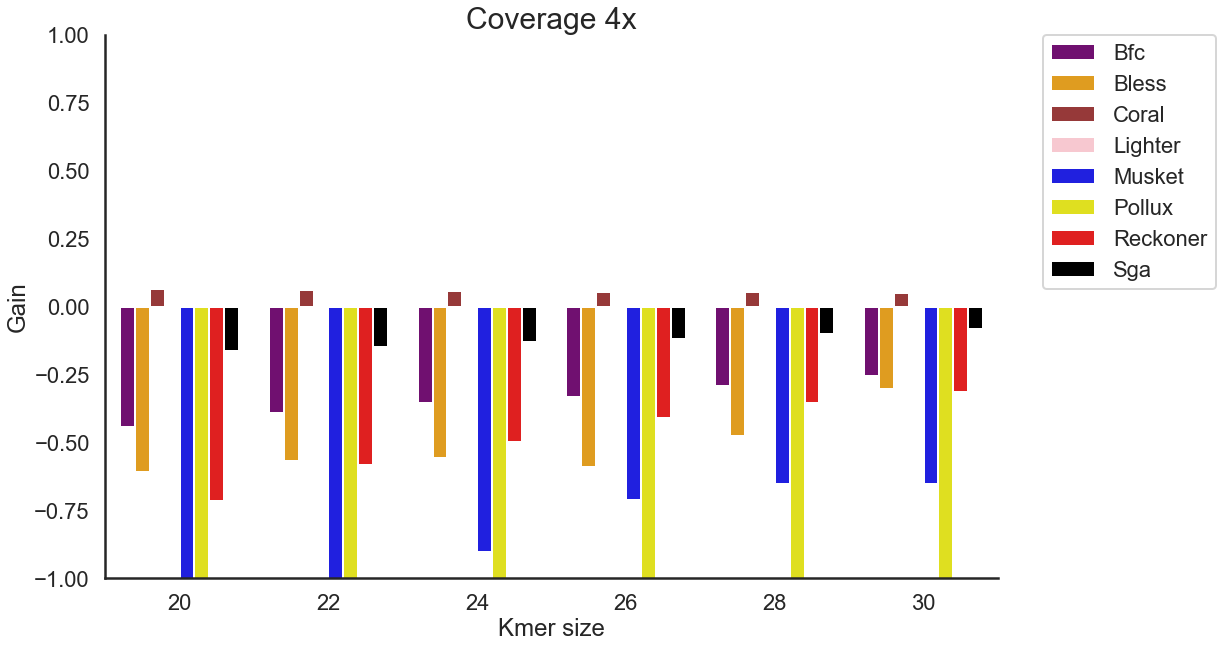

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="Base Gain", data=data[(data['Coverage'] ==4)], hue='Tool',palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 4x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()

#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov4.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov4.pdf", bbox_inches='tight')

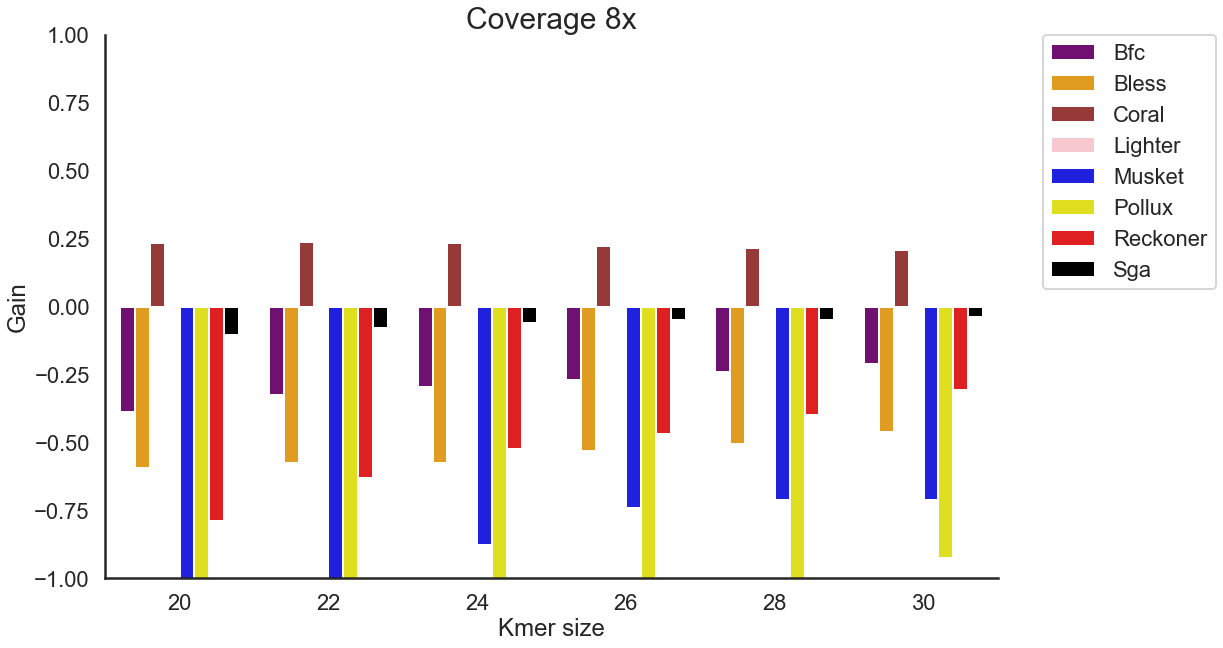

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g = sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==8)], hue='Tool',palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 8x", fontsize =30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov8.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov8.pdf", bbox_inches='tight')

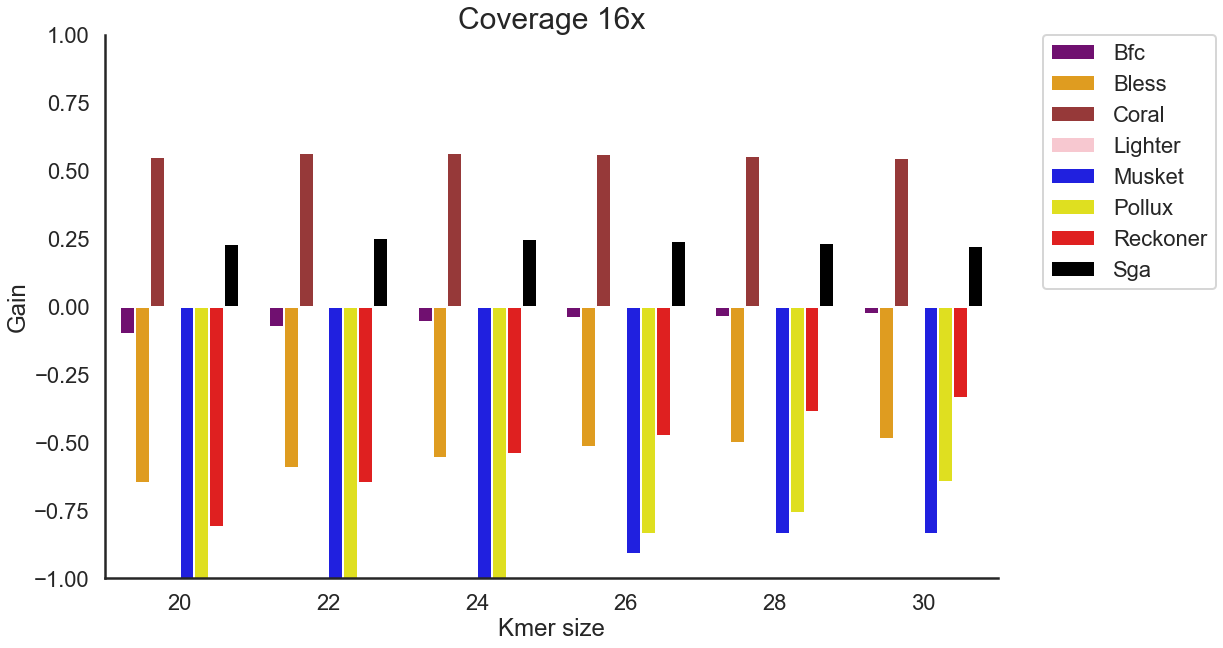

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g = sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==16)], hue='Tool',palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 16x", fontsize =30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov16.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov16.pdf", bbox_inches='tight')

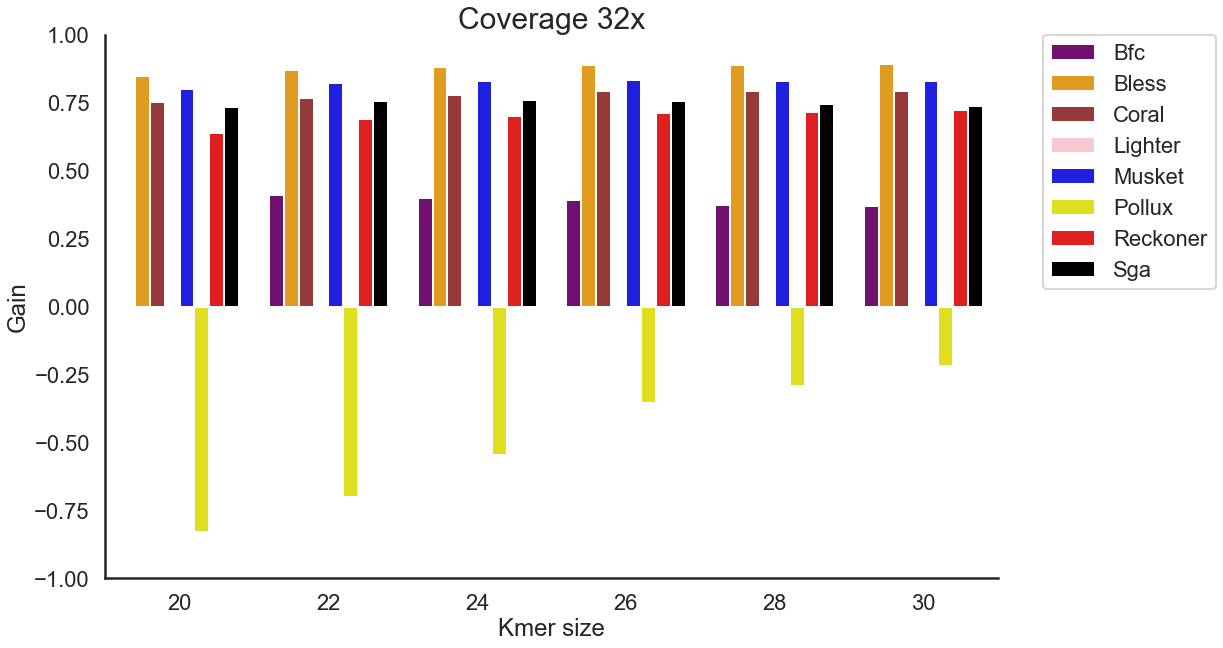

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g = sns.barplot(x="Kmer Size", y="Base Gain",data = data[(data['Coverage'] ==32)], hue='Tool',palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Gain')
g=plt.ylim(-1, 1)
g=plt.title("Coverage 32x", fontsize =30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_gain_cov32.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_gain_cov32.pdf", bbox_inches='tight')

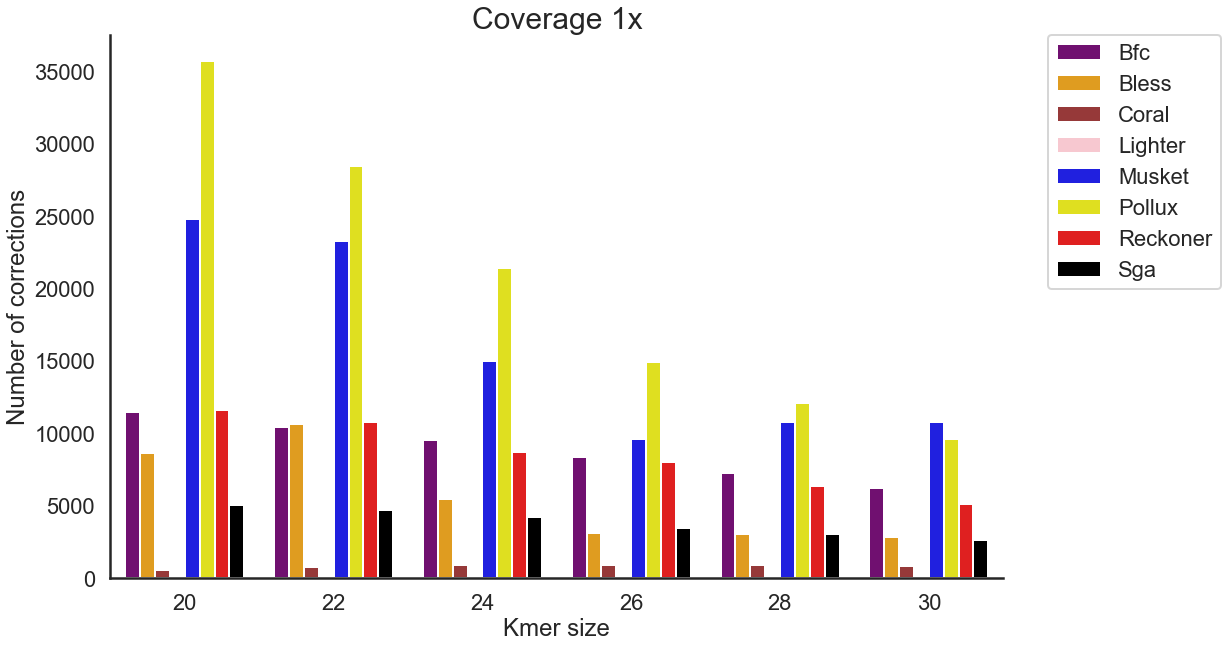

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==1)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 1x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.pdf", bbox_inches='tight')

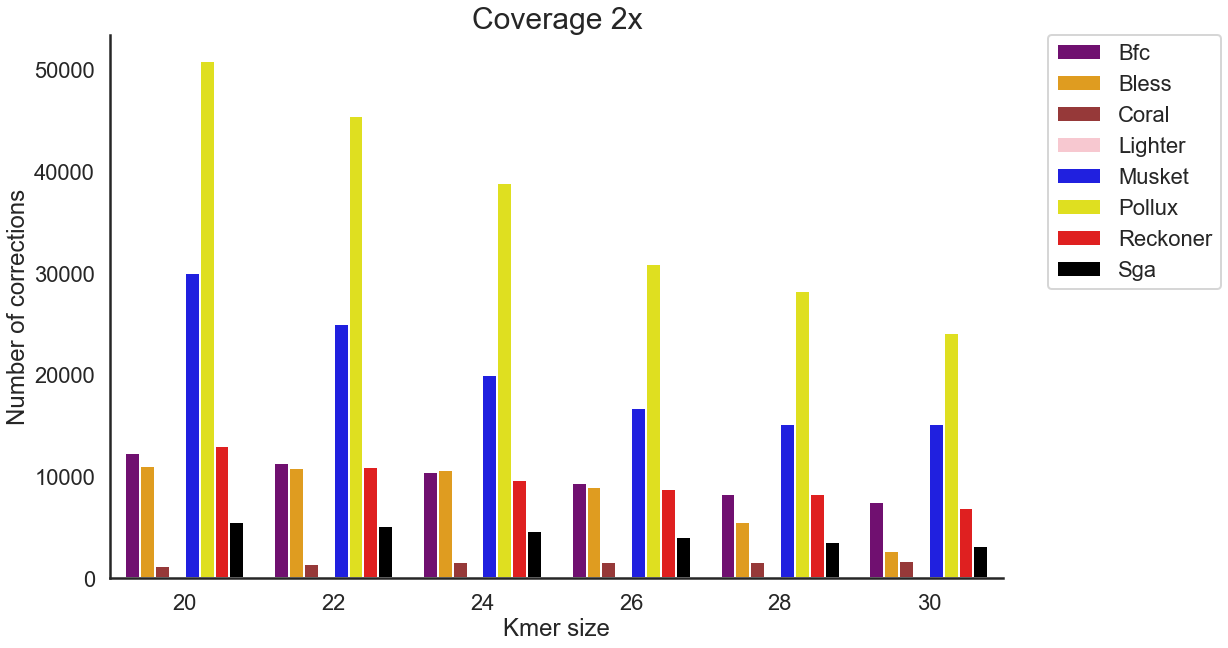

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==2)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 2x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov2.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov2.pdf", bbox_inches='tight')

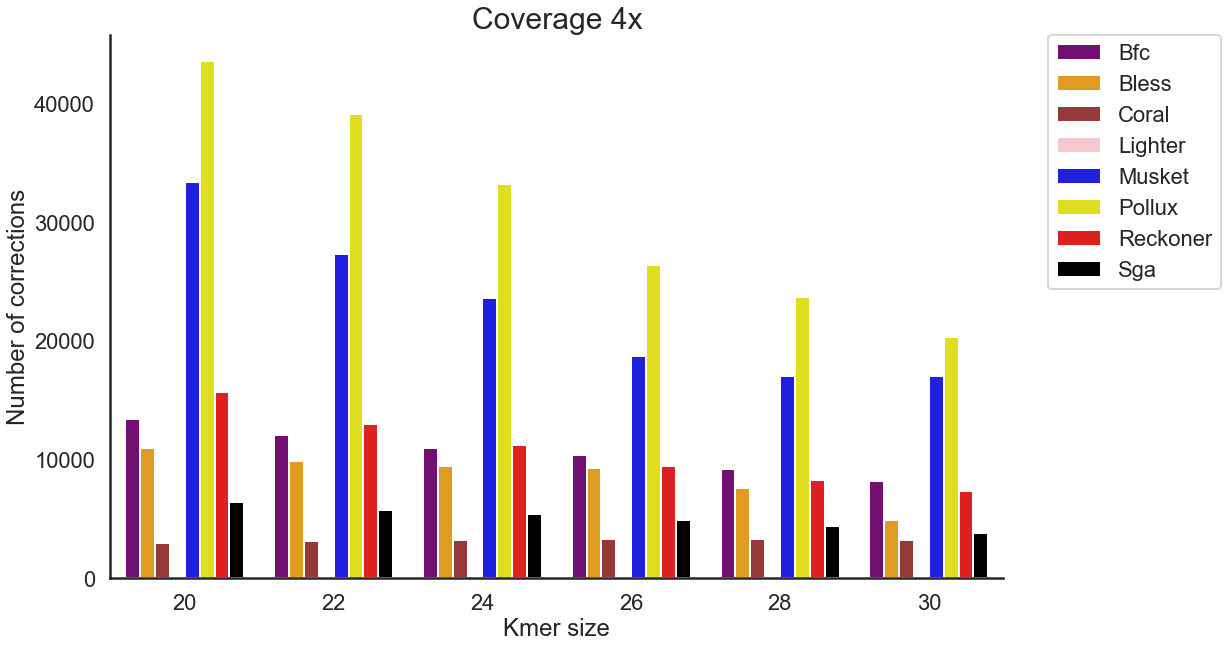

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==4)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 4x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov4.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov4.pdf", bbox_inches='tight')

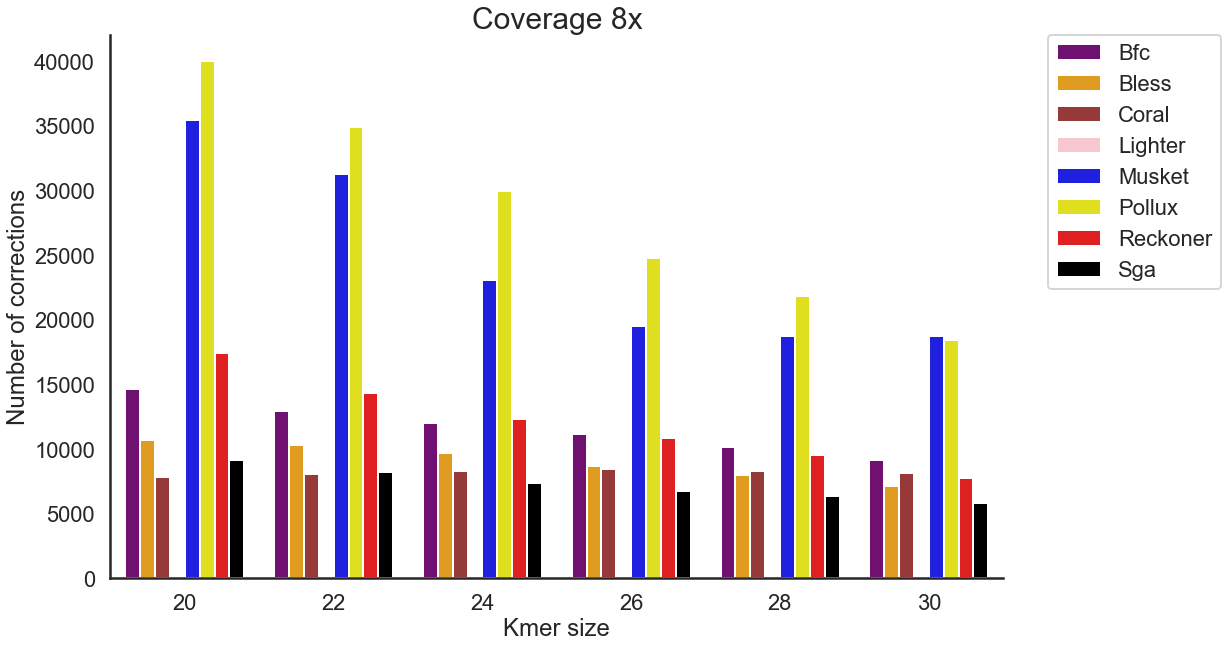

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==8)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 8x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov8.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov8.pdf", bbox_inches='tight')

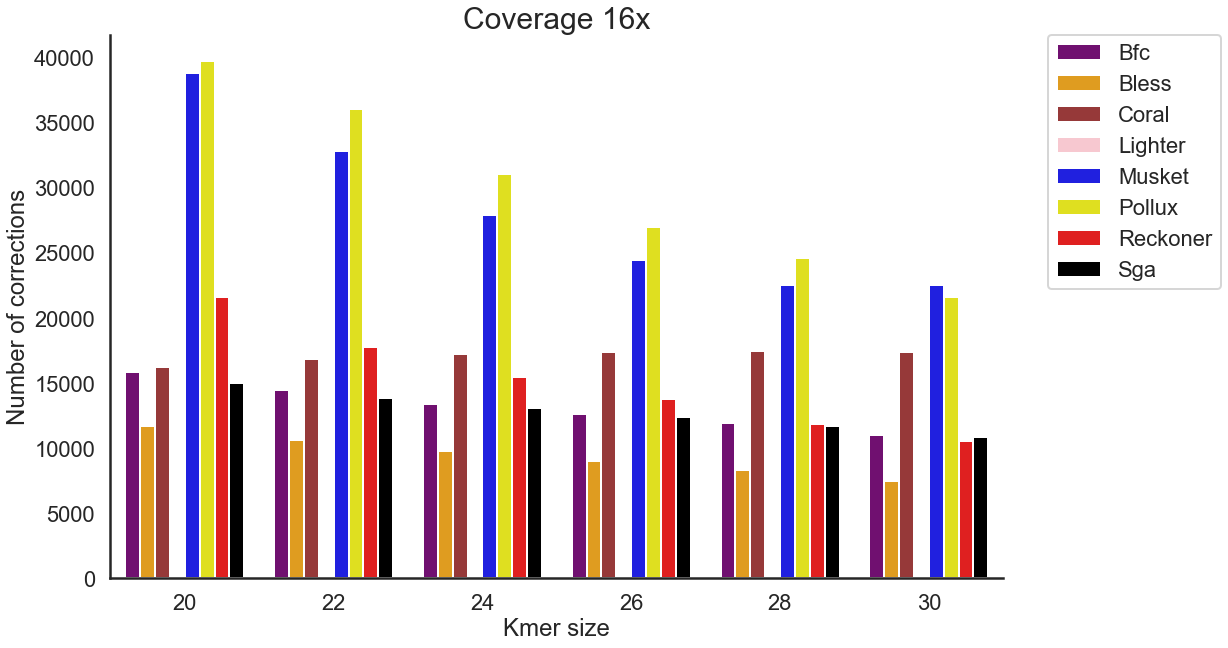

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==16)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 16x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov16.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov16.pdf", bbox_inches='tight')

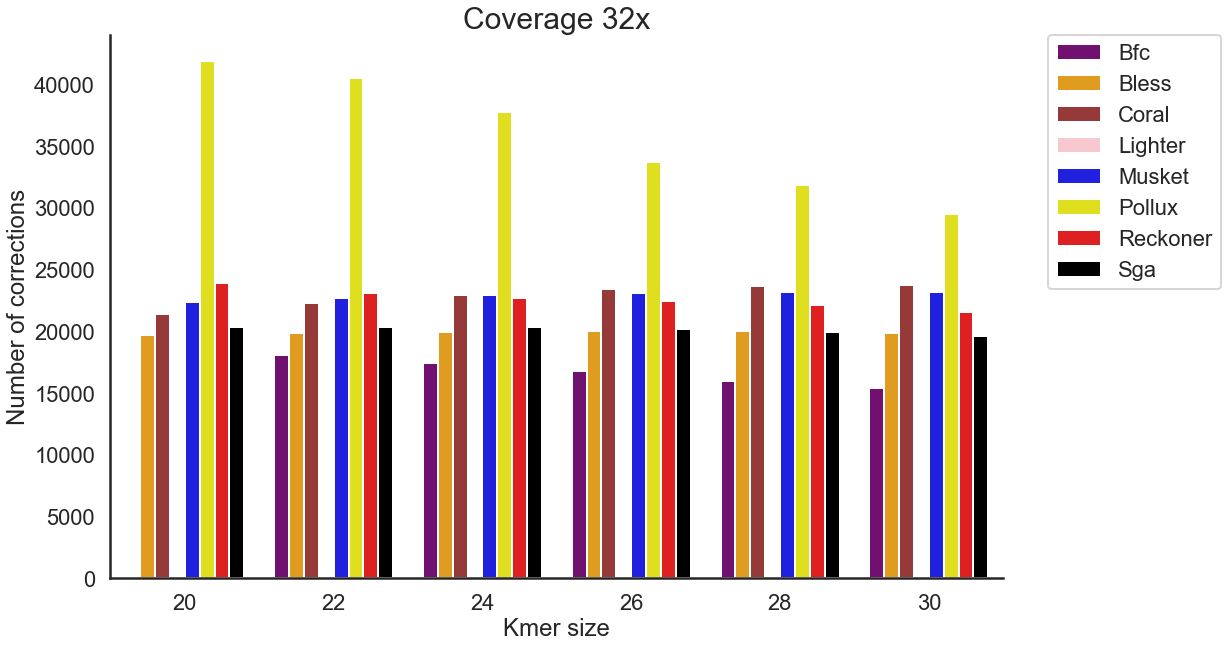

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Kmer Size", y="total_corrections",data = data[(data['Coverage'] ==32)],hue='Tool', palette=color_dict)
g.set(xlabel='Kmer size', ylabel='Number of corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Coverage 32x", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov32.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov32.pdf", bbox_inches='tight')

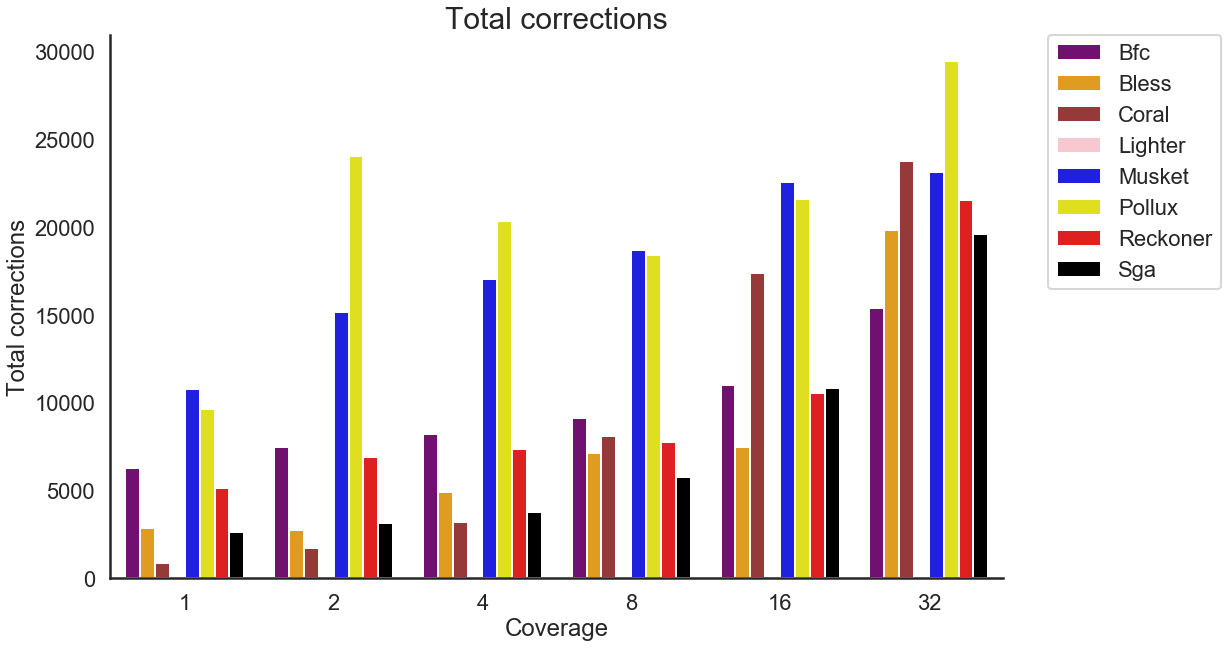

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Coverage", y="total_corrections",data = data[(data['Kmer Size'] ==30)],hue='Tool', palette=color_dict)
g.set(xlabel='Coverage', ylabel='Total corrections')
#g=plt.ylim(-1, 1)
g=plt.title("Total corrections", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_total_corrections_cov1.pdf", bbox_inches='tight')

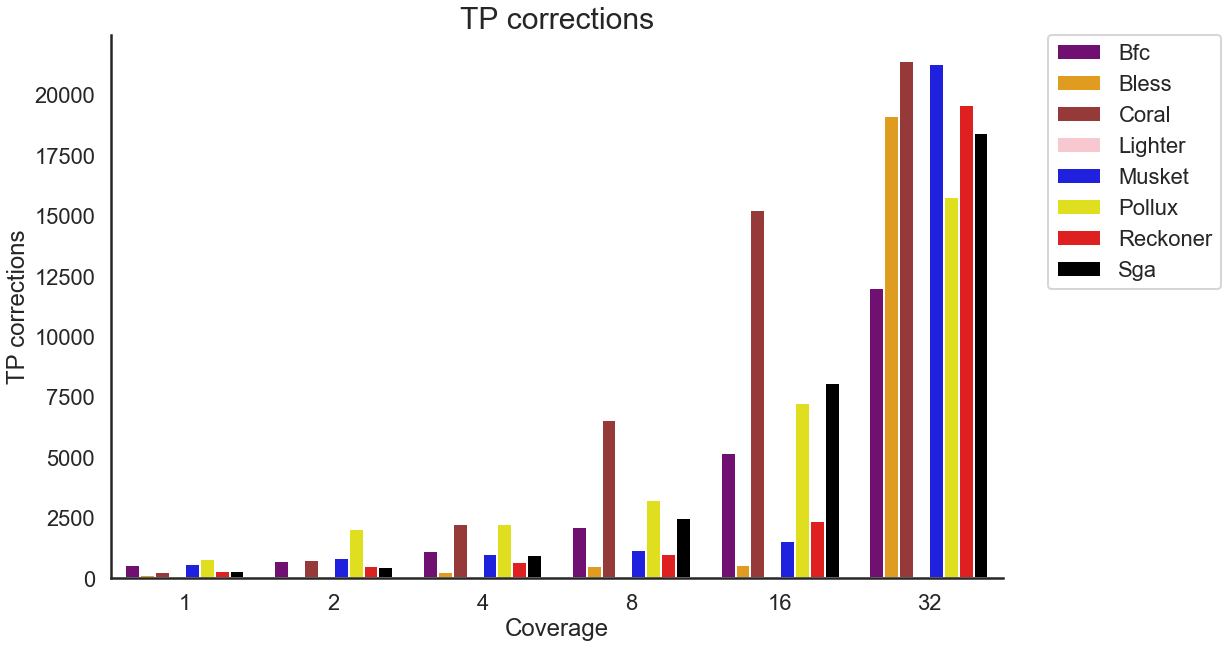

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Coverage", y="Base - TP",data = data[(data['Kmer Size'] ==30)],hue='Tool', palette=color_dict)
g.set(xlabel='Coverage', ylabel='TP corrections')
#g=plt.ylim(-1, 1)
g=plt.title("TP corrections", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_TP_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_TP_corrections_cov1.pdf", bbox_inches='tight')

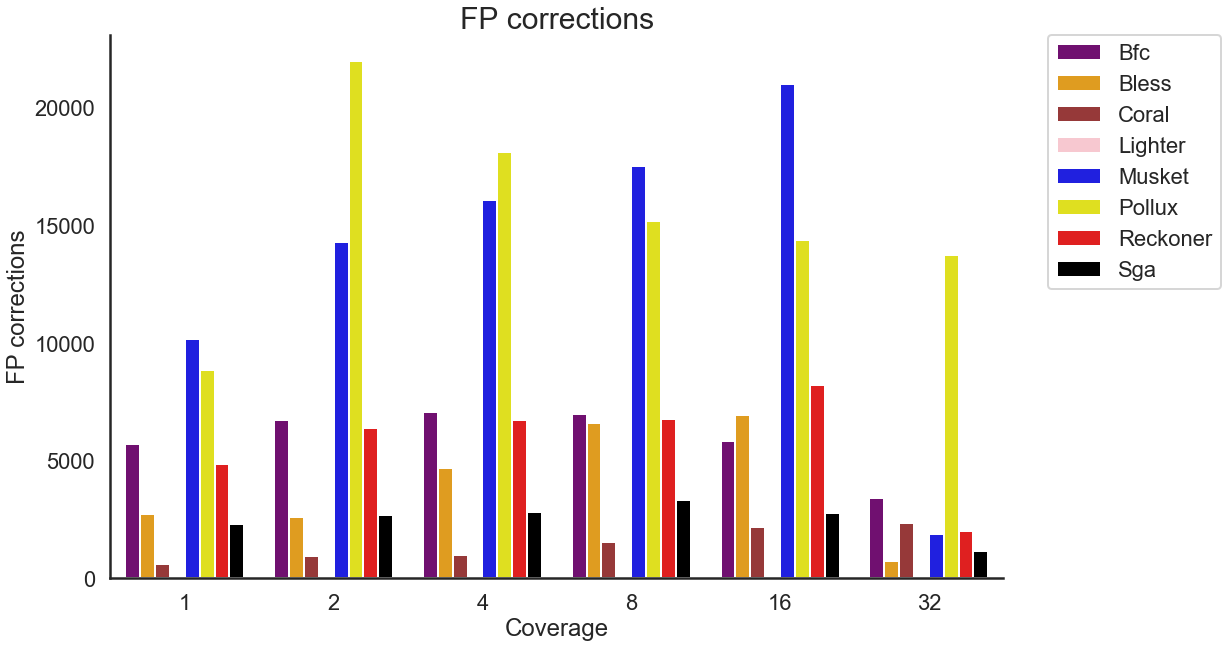

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Coverage", y="Base - FP",data = data[(data['Kmer Size'] ==30)],hue='Tool', palette=color_dict)
g.set(xlabel='Coverage', ylabel='FP corrections')
#g=plt.ylim(-1, 1)
g=plt.title("FP corrections", fontsize=30)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_FP_corrections_cov1.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_FP_corrections_cov1.pdf", bbox_inches='tight')

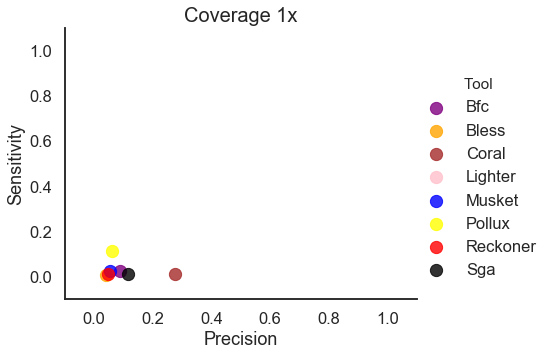

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 1) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 1x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov1.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov1.pdf")

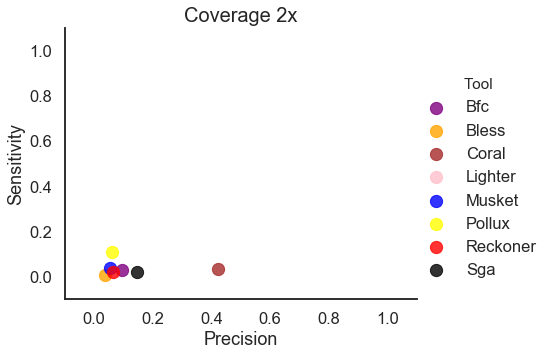

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 2) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 2x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov2.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov2.pdf")

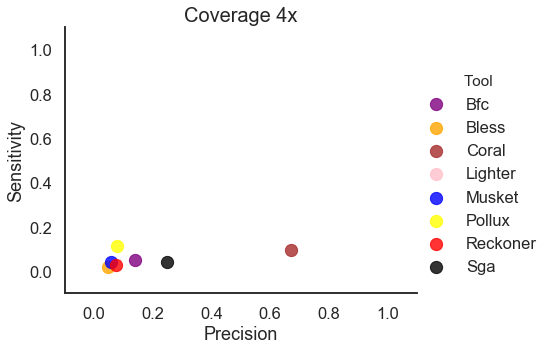

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 4) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 4x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov4.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov4.pdf")

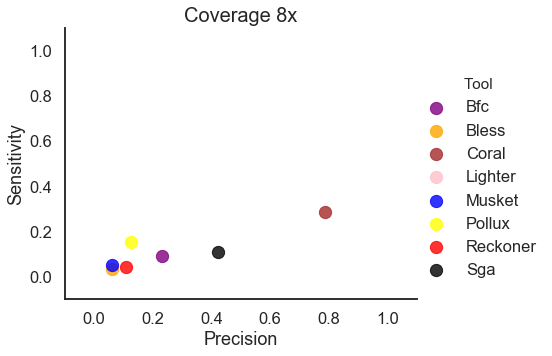

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 8) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 8x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov8.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov8.pdf")

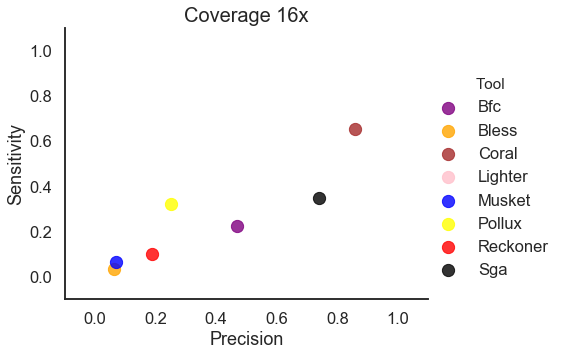

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 16) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 16x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov16.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov16.pdf")

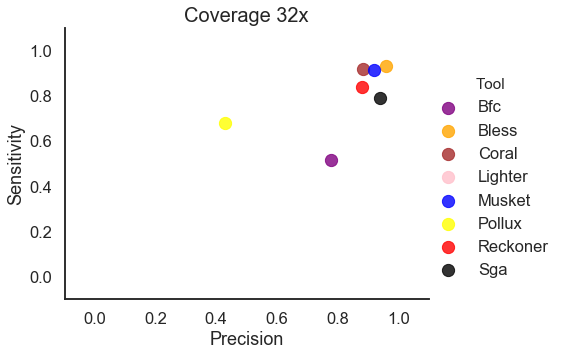

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 32) & (data['Kmer Size'] == 30)] , x='Base Precision', y='Base Sensitivity', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Precision', ylabel='Sensitivity')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 32x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")

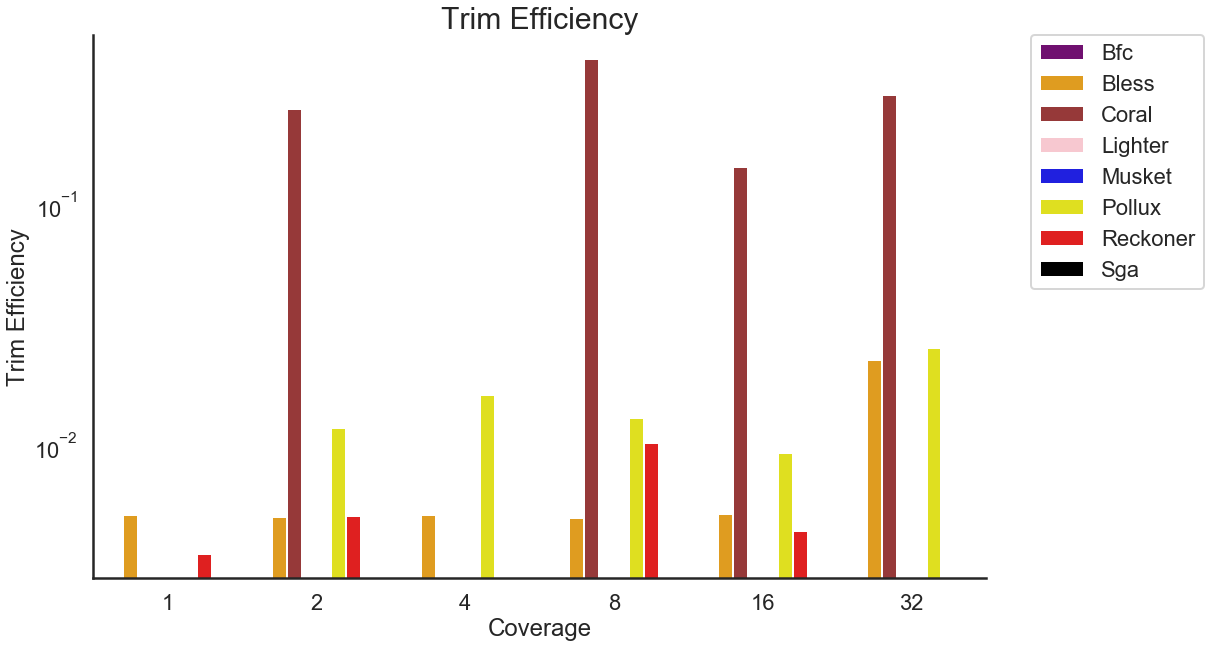

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")
g=sns.barplot(x="Coverage", y="Trim Effeciency",data = data[(data['Kmer Size'] ==30)],hue='Tool', palette=color_dict)
g.set(xlabel='Coverage', ylabel='Trim Efficiency')
g.set_yscale("log")
#g=plt.ylim(-1, 1)
g=plt.title("Trim Efficiency", fontsize=30)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

g=sns.despine()
#plt.show(g)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.savefig("../figures/WGS_human_kmers_Trim Effeciency_kmer30.png", bbox_inches='tight')
plt.savefig("../figures/WGS_human_kmers_Trim Effeciency_kmer30.pdf", bbox_inches='tight')

In [27]:
print(data.columns)

Index(['Unnamed: 0', 'EC Filename', 'Wrapper Name', 'Kmer Size', 'Read - TP',
       'Read - TN', 'Read - FN', 'Read - FN WRONG', 'Read - FP',
       'Read - FP INDEL', 'Total Trimmed Reads', 'Total Reads', 'Base - TP',
       'Base - TN', 'Base - FN', 'Base - FN WRONG', 'Base - FP',
       'Base - FP INDEL', 'Base - FP TRIM', 'Base - TP TRIM', 'Total Bases',
       'Tool', 'Coverage', 'Length', 'Base Sensitivity', 'Base Precision',
       'Base Gain', 'Base Accuracy', 'Dataset', 'Trim Percent',
       'Trim Effeciency', 'total_corrections'],
      dtype='object')


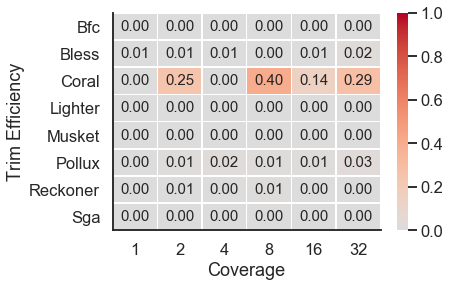

In [28]:
result = data[(data['Kmer Size'] ==30)].pivot(index='Tool', columns='Coverage', values='Trim Effeciency')
result=result.fillna(0)


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Efficiency')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/WGS_human/heatmap_humna_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/WGS_human/heatmap_human_sensitivity.pdf",bbox_inches="tight")

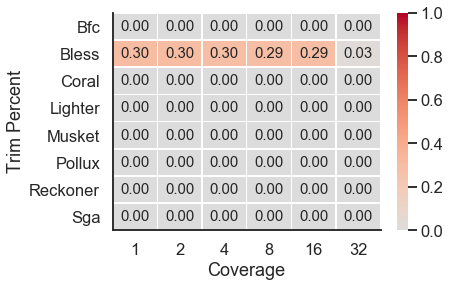

In [29]:
result = data[(data['Kmer Size'] ==30)].pivot(index='Tool', columns='Coverage', values='Trim Percent')
result=result.fillna(0)


import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)

g.set(xlabel='Coverage', ylabel='Trim Percent')
g=sns.despine()
#plt.show(g)
plt.savefig("../figures/WGS_human/heatmap_humna_sensitivity.png",bbox_inches="tight")
plt.savefig("../figures/WGS_human/heatmap_human_sensitivity.pdf",bbox_inches="tight")

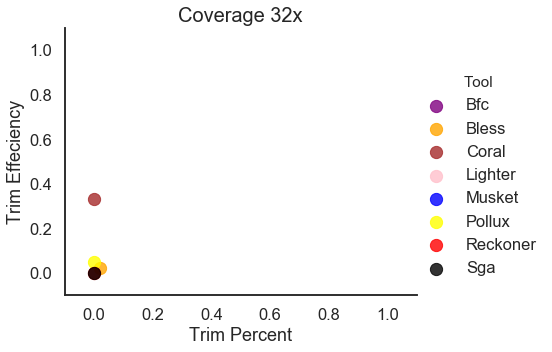

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.lmplot(data=data[(data['Coverage'] == 32) & (data['Kmer Size'] == 24)] , x='Trim Percent', y='Trim Effeciency', hue='Tool', palette=color_dict, fit_reg=False,aspect=1.3,scatter_kws={"s": 150})
g.set(xlabel='Trim Percent', ylabel='Trim Effeciency')
#plt.title(str(th)+"bp")
#g.set(xscale="log");
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
g=plt.title("Coverage 32x", fontsize=20)

g=sns.despine()
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.png")
plt.savefig("../figures/WGS_human//lmplot_Precision_vs_Sensitivity_cov32.pdf")